In [1]:
%matplotlib inline

# PolyLX tutorial - python package for microstructural analysis

The microstructural analysis is a powerful, but underused tool of petrostructural analysis. Except acquirement of common statistical parameters, this technique can significantly improve understanding of processes of grain nucleation and grain growth, can bring insights on the role of surface energies or quantify duration of metamorphic and magmatic cooling events as long as appropriate thermodynamical data for studied mineral exist. This technique also allows systematic evaluation of degree of preferred orientations of grain boundaries in conjunction with their frequencies. This may help to better understand the mobility of grain boundaries and precipitations or removal of different mineral phases.

We introduce a new platform, object-oriented Python package PolyLX providing several core routines for data exchange, visualization and analysis of microstructural data, which can be run on any platform supported by Scientific Python environment.

## Installation

During alpha stage the package is only available on GitHub https://github.com/ondrolexa/polylx

### Requirements

PolyLX need Python 2/3 with several packages from scientific python ecosystem namely, numpy, matplotlib, scipy, pandas, shapely and networkx. GDAL python extension is necessary only to import other formats than ESRI shapefile or OpenJUMP JML which are built-in. 

## First steps

To start working with PolyLX we need import package. For our convinience, we can import PolyLX into actual namespace (the other command is just to setup figure size in this notebook):

In [2]:
from polylx import *
plt.rcParams['figure.figsize'] = (8.0, 6.4)

To read example data, we can use from_shp method without arguments. Note that we create new `Grains` object, which store all imported features (`Grain`) from shapefile.

In [3]:
g = Grains.from_shp()

To visualize grain objects from shape file, we can use `plot` method of `Grains` object:

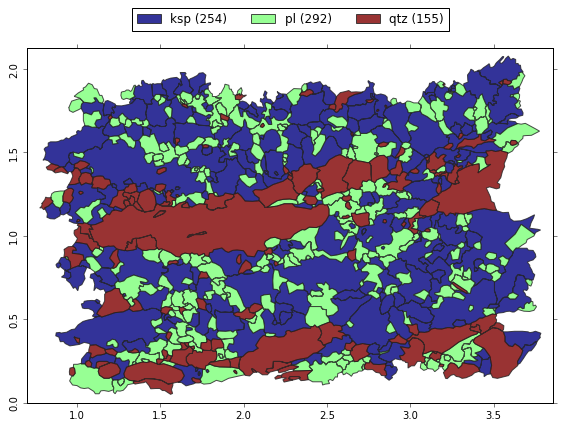

In [4]:
g.plot()

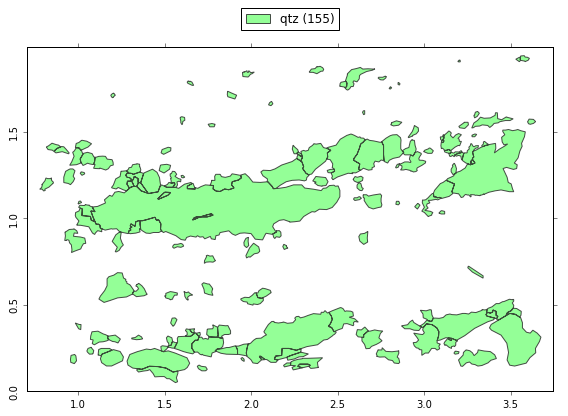

In [5]:
g['qtz'].plot()

The dot notation is used to access individual properties as `numpy` array.

In [6]:
g['qtz'].ar

array([ 1.46370088,  3.55371458,  1.43641139,  1.26293055,  2.10676277,
        1.45200805,  1.98973326,  1.97308557,  2.13420187,  1.76682269,
        1.70083897,  1.38205897,  1.88811465,  1.59948827,  2.50452919,
        1.60296389,  1.4918233 ,  2.15318719,  1.27665794,  1.38714959,
        1.67235338,  2.33179583,  1.30609967,  2.73148246,  1.02760669,
        1.33627299,  2.65451284,  1.29069569,  1.73051094,  1.25763409,
        1.90027316,  2.56110638,  1.78555385,  2.40926108,  2.26741705,
        1.71957235,  1.79168709,  1.04770164,  1.293186  ,  1.29420065,
        1.48331817,  2.15510614,  2.21246419,  1.57101091,  2.01989715,
        1.1428675 ,  2.02888455,  4.07405108,  1.47968881,  1.24770095,
        1.4750185 ,  1.37946472,  1.49048108,  1.56668345,  1.43717521,
        1.59756777,  1.58948843,  2.12557437,  2.54316052,  1.98917177,
        1.29809155,  1.70022052,  1.40121941,  1.24674038,  1.50255058,
        1.42880415,  1.73447054,  2.3548111 ,  1.52891827,  3.26

or we can collect any properties to `pandas.DataFrame` using `df` method:

In [7]:
g.df('la', 'sa', 'lao', 'sao', 'area', 'perimeter', 'ead', 'ar').head(10)

,la,sa,lao,sao,area,perimeter,ead,ar
0,0.066027,0.045110,70.596636,160.596636,0.002286,0.186196,0.053956,1.463701
1,0.099033,0.057029,70.983857,160.983857,0.004409,0.258753,0.074922,1.736522
2,0.074248,0.020893,61.438248,151.438248,0.001123,0.175821,0.037813,3.553715
3,0.045232,0.031489,85.088587,175.088587,0.001005,0.134427,0.035779,1.436411
4,0.136445,0.108038,170.839835,80.839835,0.011489,0.398558,0.120948,1.262931
5,0.073578,0.044938,123.223347,33.223347,0.002471,0.201258,0.056090,1.637319
6,0.103567,0.065119,149.397514,59.397514,0.005213,0.283110,0.081474,1.590441
7,0.103189,0.077988,23.758847,113.758847,0.005951,0.318774,0.087048,1.323142
8,0.187049,0.036611,82.108720,172.108720,0.004407,0.404066,0.074904,5.109041
9,0.270513,0.128402,76.193288,166.193288,0.024576,0.729051,0.176894,2.106763


In [8]:
g.df('ead').describe()

,ead
count,701.000000
mean,0.072812
std,0.056812
min,0.000350
25%,0.037140
50%,0.058338
75%,0.093503
max,0.638144


To aggregate properties according to defined classification (`name` by default) we can use `agg` method:

In [9]:
g.agg('sum','area','mean','ead','count','name')

,sum_area,mean_ead,count_name
ksp,2.443733,0.089710,254
pl,1.083516,0.060629,292
qtz,1.166097,0.068071,155


The `group` method return Pandas `GroupBy` object which allows any pandas-style manipulation

In [10]:
g.groups('ead', 'area', 'la', 'sa').describe()

ead          area          la          sa
ksp count  254.000000  2.540000e+02  254.000000  254.000000
    mean     0.089710  9.620995e-03    0.129674    0.075629
    std      0.064951  1.548182e-02    0.105569    0.054678
    min      0.000664  3.464873e-07    0.001014    0.000365
    25%      0.041330  1.341681e-03    0.054396    0.033707
    50%      0.074033  4.304819e-03    0.098719    0.066438
    75%      0.119173  1.115444e-02    0.179395    0.102152
    max      0.410552  1.323812e-01    0.811792    0.331145
pl  count  292.000000  2.920000e+02  292.000000  292.000000
    mean     0.060629  3.710670e-03    0.086752    0.049712
    std      0.032438  4.170410e-03    0.053272    0.027782
    min      0.001850  2.687133e-06    0.006461    0.000583
    25%      0.038226  1.147676e-03    0.050202    0.032304
    50%      0.053984  2.288940e-03    0.072777    0.043545
    75%      0.077308  4.693978e-03    0.107128    0.063696
    max      0.190210  2.841559e-02    0.279398    0.166726
qtz count  155.000000  1.550000e+02  155.000000  155.000000
    mean     0.068071  7.523208e-03    0.101963    0.052571
    std      0.070550  2.778736e-02    0.136847    0.046436
    min      0.000350  9.629176e-08    0.001017    0.000146
    25%      0.029702  6.930225e-04    0.043142    0.021831
    50%      0.047946  1.805471e-03    0.071513    0.036406
    75%      0.078927  4.892680e-03    0.120651    0.064901
    max      0.638144  3.198359e-01    1.440927    0.306707

The method `classify` could be used to define new classification, based on any property and using variety of methods:

In [11]:
g.classify('ead', 'user', np.arange(0,0.7,0.05))
df = g.df('class', 'name', 'area')
df.head()

,ead_class,name,area
0,0.05-0.1,qtz,0.002286
1,0.05-0.1,pl,0.004409
2,0-0.05,qtz,0.001123
3,0-0.05,qtz,0.001005
4,0.1-0.15,qtz,0.011489


To summarize results for individual phases per class we can use pandas pivot table:

In [12]:
pd.pivot_table(df,index=['ead_class'], columns=['name'], aggfunc=np.sum)

area                    
name            ksp        pl       qtz
ead_class                              
0-0.05     0.062384  0.121512  0.066795
0.05-0.1   0.363246  0.553436  0.172737
0.1-0.15   0.647782  0.225262  0.200288
0.15-0.2   0.538089  0.183306  0.084121
0.2-0.25   0.313395       NaN  0.151260
0.25-0.3   0.121426       NaN       NaN
0.3-0.35   0.265030       NaN  0.171061
0.4-0.45   0.132381       NaN       NaN
0.6-0.65        NaN       NaN  0.319836

or we can directly plot it

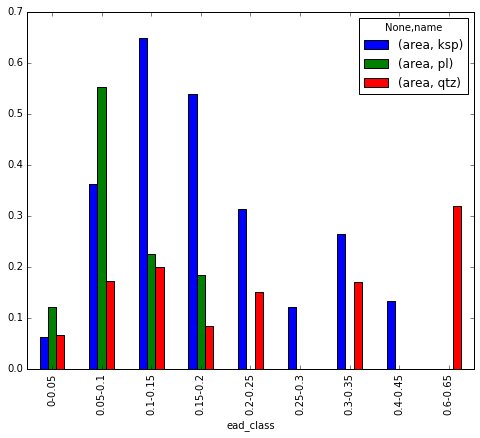

In [13]:
pd.pivot_table(df,index=['ead_class'], columns=['name'], aggfunc=np.sum).plot(kind='bar')

In [14]:
g.classify('ead', 'jenks', k=6)

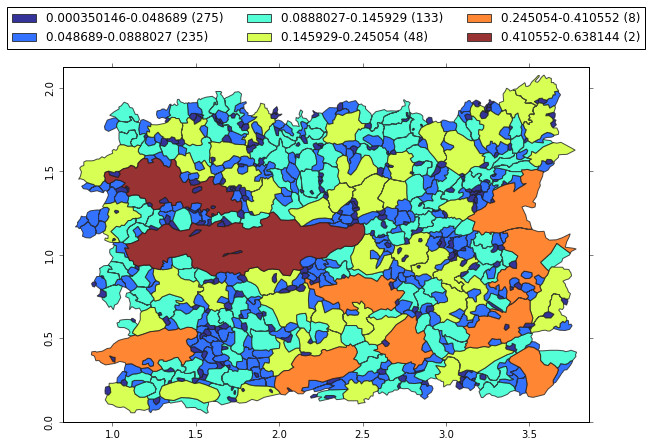

In [15]:
g.plot()

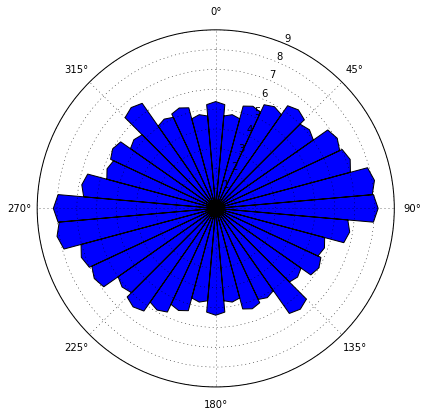

In [16]:
g.rose()

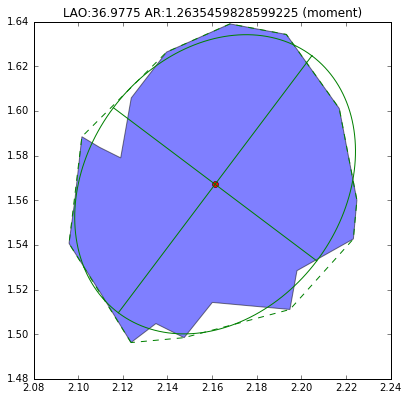

In [17]:
g[132].show()

In [18]:
b = g.boundaries()

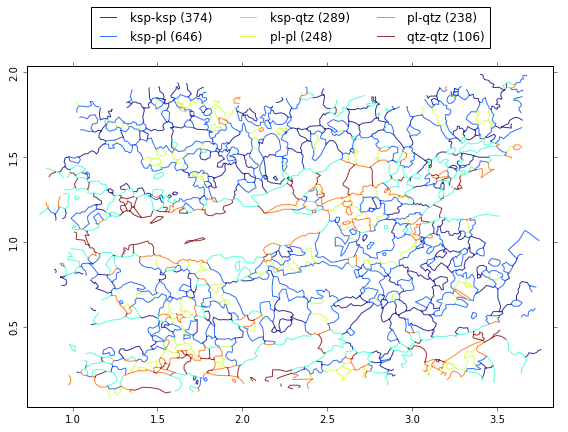

In [19]:
b.plot()

In [20]:
b.agg('sum', 'length')

,sum_length
ksp-ksp,23.383974
ksp-pl,38.592227
ksp-qtz,17.920424
pl-pl,11.302490
pl-qtz,11.535006
qtz-qtz,6.617133
